In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import json

##load the stats from file first
path=cwd = os.getcwd()
if(os.path.isfile(path+"\\"+"stats.json")):
    with open(path+"\\"+"stats.json",'r') as file:
        tempDict=json.load(file)
        reward=tempDict["reward"]
        totalCount=tempDict["totalCount"]
        totalOnTarget=tempDict["totalOnTarget"]
        phasesTemp=tempDict["phasesTemp"]
        shootCount=tempDict["shootCount"]
        phasesOnTarget=tempDict["phasesOnTarget"]
        arrowAngleCount=eval(tempDict["arrowAngleCount"])
        arrowAngleOn=eval(tempDict["arrowAngleOn"])

35647


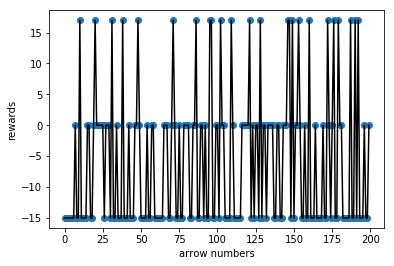

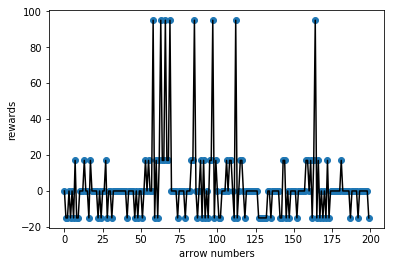

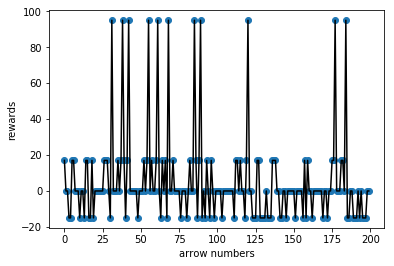

In [13]:
## print reward choice 
print(len(reward))
plt.plot(reward[0:200],"o",reward[0:200],'k')
plt.xlabel("arrow numbers")
plt.ylabel("rewards")
plt.show()

plt.plot(reward[25000:25200],"o",reward[25000:25200],'k')
plt.xlabel("arrow numbers")
plt.ylabel("rewards")
plt.show()

plt.plot(reward[35000:35200],"o",reward[35000:35200],'k')
plt.xlabel("arrow numbers")
plt.ylabel("rewards")
plt.show()


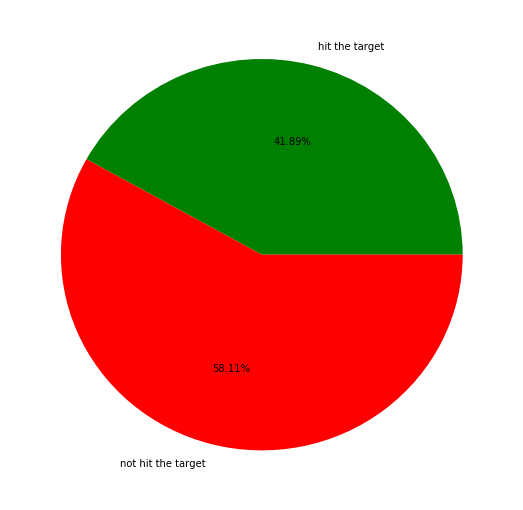

In [3]:
##饼状图射中的分布没射中的分布 after trainning
plt.figure(figsize=(9,9))
labels=["hit the target","not hit the target"]
nums=[totalOnTarget,shootCount-totalOnTarget]
explode=(0,0)
colors=["green","red"]
plt.pie(nums,explode=explode,labels=labels,colors=colors,autopct = '%3.2f%%')
plt.show()

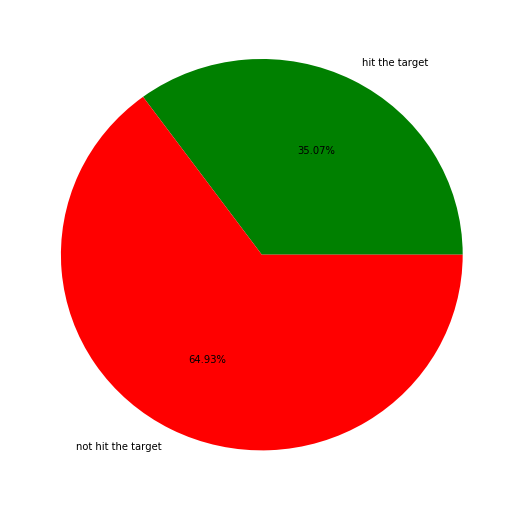

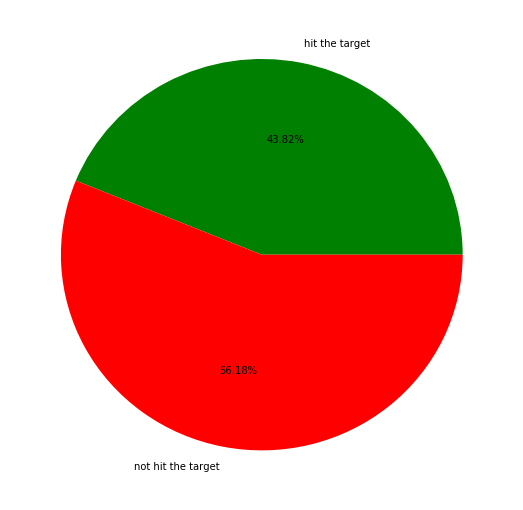

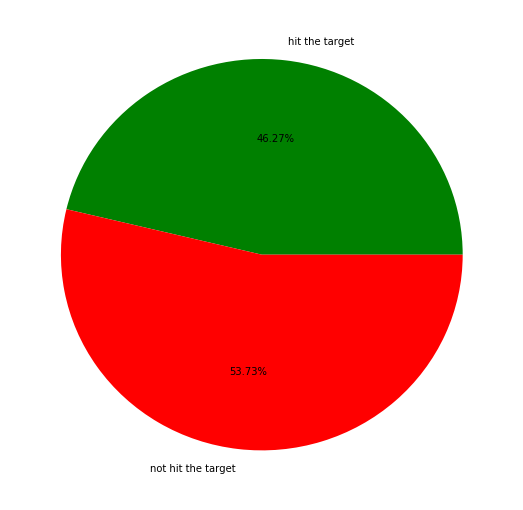

In [17]:
## plot accuracy of every 10000 shoted
for i in phasesOnTarget:
    plt.figure(figsize=(9,9))
    labels=["hit the target","not hit the target"]
    nums=[i,4500-i]
    explode=(0,0)
    colors=["green","red"]
    plt.pie(nums,explode=explode,labels=labels,colors=colors,autopct = '%3.2f%%')
    plt.show()

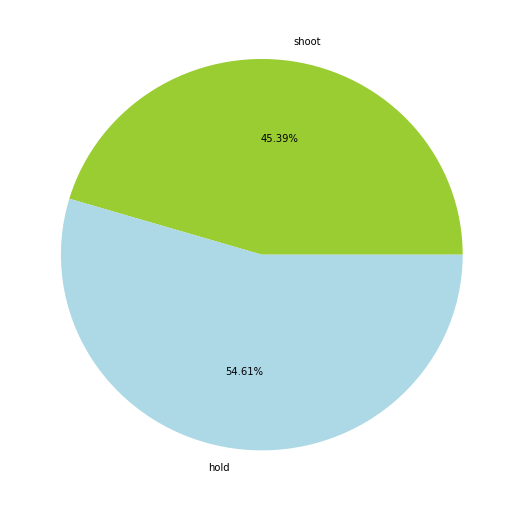

In [5]:
##shoot comapring with hold
plt.figure(figsize=(9,9))
labels=["shoot","hold"]
nums=[shootCount,totalCount-shootCount]
explode=(0,0)
colors=["yellowgreen","lightblue"]
plt.pie(nums,explode=explode,labels=labels,colors=colors,autopct = '%3.2f%%')
plt.show()

In [6]:
LR=[81,83,85,87,89,91,93,95,97,99]
UD=[0,-1,-2,-3,-4,-5]

def toArray(D):
    Ditems=list(D.items())
    temp=list()
    for i in range(len(UD)):
        temp1=[]
        for j in range(len(LR)):
            temp1.append(0)
        temp.append(temp1)
    
    for k in Ditems:
        temp[UD.index(k[0][1])][LR.index(k[0][0])]=k[1]
    return temp
    
##----------------------code below inside "---" from https://matplotlib.org/3.1.0/gallery/images_contours_and_fields/image_annotated_heatmap.html----------
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

##-------------------------------------------------------------------------------------------------------------------------------

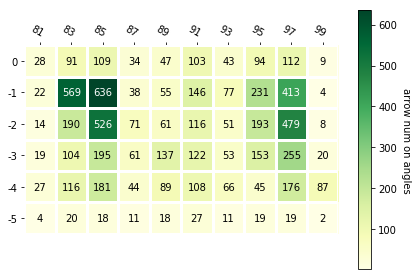

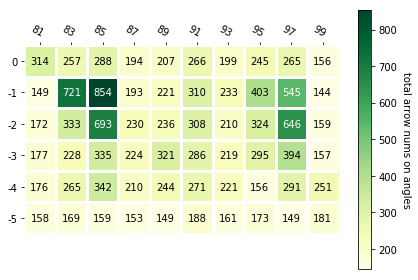

In [9]:
fig, ax = plt.subplots()
onArray=np.array(toArray(arrowAngleOn))
totalArray=np.array(toArray(arrowAngleCount))
im, cbar = heatmap(onArray, UD,LR , ax=ax,
                   cmap="YlGn", cbarlabel="arrow num on angles")
texts = annotate_heatmap(im, valfmt="{x}")
fig.tight_layout()
plt.show()

fig, ax = plt.subplots()
im, cbar = heatmap(totalArray, UD,LR , ax=ax,
                   cmap="YlGn", cbarlabel="total arrow nums on angles")
texts = annotate_heatmap(im, valfmt="{x}")
fig.tight_layout()
plt.show()

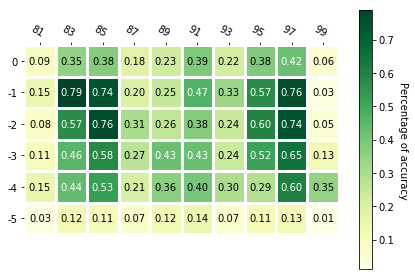

In [10]:
fig, ax = plt.subplots()
im, cbar = heatmap(onArray/totalArray, UD,LR , ax=ax,
                   cmap="YlGn", cbarlabel="Percentage of accuracy")
texts = annotate_heatmap(im, valfmt="{x:.2f}")
fig.tight_layout()
plt.show()